In [1]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np

## 数据处理

In [2]:
df = pd.read_csv('./data/Default.csv')
type_dict = {
    "Yes":1,
    "No":0,
}
df['default'] = df['default'].map(type_dict)
df['student'] = df['student'].map(type_dict)
df.head()

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879


In [159]:
print(df.info())
# print(df.describe())
# print(df.shape)
# print(df.corr())
print(df['default'].value_counts())
print(df['student'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  int64  
 1   student  10000 non-null  int64  
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 312.6 KB
None
0    9667
1     333
Name: default, dtype: int64
0    7056
1    2944
Name: student, dtype: int64


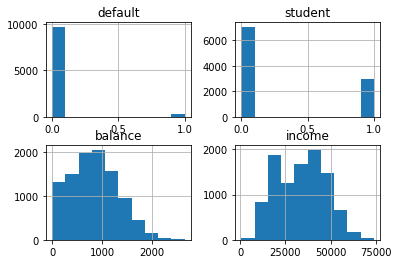

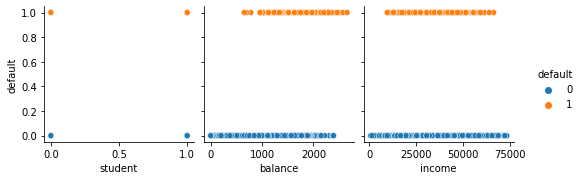

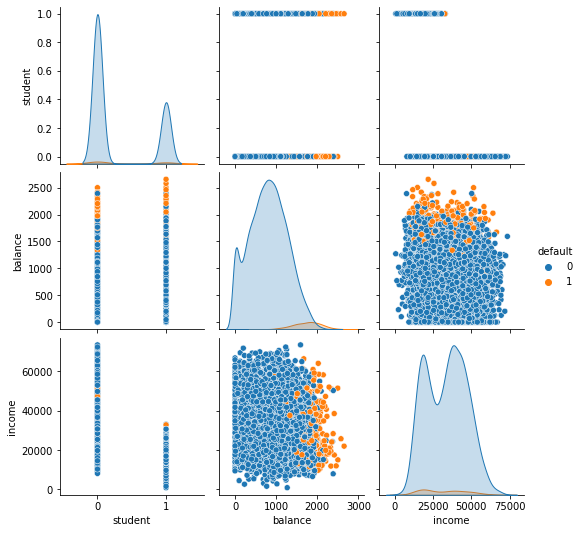

In [5]:
df.hist()
sb.pairplot(df,x_vars=['student','balance','income'],y_vars='default',hue='default',kind='scatter')
sb.pairplot(df,hue='default')

# Logistic regression

In [39]:
from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split

## 单变量Logistic Regression

In [186]:
def single_var_logistic(data,param_name,yname='default'):
    print('=============================',param_name,'===============================')
    X = data[param_name].values.reshape(-1,1)
    y = data[yname]
    n = 30
    print('X and y sizes:', len(X), len(y))
    coefs = np.zeros(n)
    intercepts = np.zeros(n)
    for i in range(n):
        X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=i)
        logistic = lm.LogisticRegression(C=1e5)
        logistic.fit(X_train,y_train)
        intercepts[i] = logistic.intercept_
        coefs[i] = logistic.coef_[0]
        if i==0:
            print("Total number of frauds:",len(y.loc[df['default']==1])
                      ,'| rate:',len(y.loc[df['default']==1])/len(y),'%')
            print("Number of frauds on y_test:", len(y_test.loc[df['default'] == 1])
                      , '| rate:',len(y_test.loc[df['default'] == 1]) / len(y_test),'%')
            print("Number of frauds on y_train:", len(y_train.loc[df['default'] == 1])
                      , '| rate:',len(y_train.loc[df['default'] == 1])/len(y_train),'%')
            print('Accuracy from sk-learn:',logistic.score(X_test,y_test))
    coef = np.mean(coefs)
    intercept = np.mean(intercepts)
    print('intercept:',intercept)
    print('coefficient:',coef)
    return intercept,coef

In [161]:
def get_p(X,a,b):
    return np.exp(a+b*X)/(1+np.exp(a+b*X))
def plot_p(X,y,a,b,X_name='Feature'):
    p = get_p(X,a,b)
    plt.scatter(X,p,c='g',marker='.',s=2)
    plt.scatter(X,y,c='y',marker='.',s=2)
    plt.xlabel(X_name)
    plt.ylabel('Probability of Default')
    plt.show()

============================= student ===============================
X and y sizes: 10000 10000
Total number of frauds: 333 | rate: 0.0333 %
Number of frauds on y_test: 74 | rate: 0.037 %
Number of frauds on y_train: 259 | rate: 0.032375 %
Accuracy from sk-learn: 0.963
intercept: -3.4947770079623206
coefficient: 0.3955950543809924


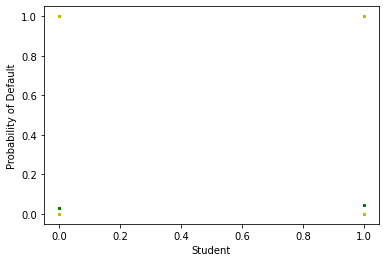

============================= balance ===============================
X and y sizes: 10000 10000
Total number of frauds: 333 | rate: 0.0333 %
Number of frauds on y_test: 74 | rate: 0.037 %
Number of frauds on y_train: 259 | rate: 0.032375 %
Accuracy from sk-learn: 0.9695
intercept: -10.65038947840689
coefficient: 0.0055061125968252555


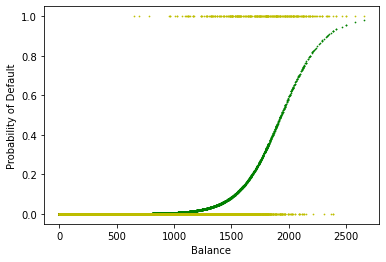

============================= income ===============================
X and y sizes: 10000 10000
Total number of frauds: 333 | rate: 0.0333 %
Number of frauds on y_test: 74 | rate: 0.037 %
Number of frauds on y_train: 259 | rate: 0.032375 %
Accuracy from sk-learn: 0.963
intercept: -0.5104261731959708
coefficient: -9.269831894622087e-05


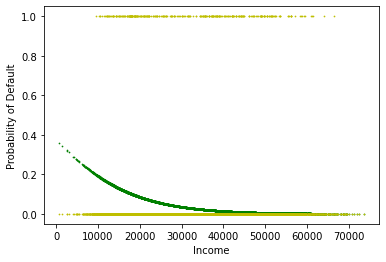

In [187]:
intercept,coef = single_var_logistic(df,'student')
plot_p(df['student'],df['default'],intercept,coef,'Student')
intercept,coef = single_var_logistic(df,'balance')
plot_p(df['balance'],df['default'],intercept,coef,'Balance')
intercept,coef = single_var_logistic(df,'income')
plot_p(df['income'],df['default'],intercept,coef,'Income')

## 多变量Logistic Regression

In [220]:
def multi_var_logistic(data):
    print('=============================Multi_Params===============================')
    X = data.iloc[:,1:]
    X['income'] /= 1000 #将income按1000为单位
    y = data['default']
    n = 30
    coefs = np.zeros([n,3])
    intercepts = np.zeros([n,3])
    print('X and y sizes:', len(X), len(y))
    
    logistic = lm.LogisticRegression(C=1e5)
    for i in range(n):
        X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=i)
        logistic.fit(X_train,y_train)
        intercepts[i] = logistic.intercept_
        coefs[i] = logistic.coef_[0]
        if i==0:
            print("Total number of frauds:",len(y.loc[df['default']==1])
                      ,'| rate:',len(y.loc[df['default']==1])/len(y),'%')
            print("Number of frauds on y_test:", len(y_test.loc[df['default'] == 1])
                      , '| rate:',len(y_test.loc[df['default'] == 1]) / len(y_test),'%')
            print("Number of frauds on y_train:", len(y_train.loc[df['default'] == 1])
                      , '| rate:',len(y_train.loc[df['default'] == 1])/len(y_train),'%')
            print('Accuracy from sk-learn:',logistic.score(X_test,y_test))
    intercept = np.mean(intercepts)
    coef = np.mean(coefs,axis=0)
    print('intercept=',intercept)
    print('coefficient=',coef)
    return logistic

In [221]:
multi_var_logistic(df)

=============================Multi_Params===============================
X and y sizes: 10000 10000
Total number of frauds: 333 | rate: 0.0333 %
Number of frauds on y_test: 74 | rate: 0.037 %
Number of frauds on y_train: 259 | rate: 0.032375 %
Accuracy from sk-learn: 0.9715
intercept= -10.852166724484691
coefficient= [-0.67097751  0.00574968  0.00247966]


LogisticRegression(C=100000.0)

## Logistic决策边界

In [164]:
#将数据拆分为student=1和student=0分别训练
df1 = df[df['student']==1]
df2 = df[df['student']==0]
print(df1.info())
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2944 entries, 1 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  2944 non-null   int64  
 1   student  2944 non-null   int64  
 2   balance  2944 non-null   float64
 3   income   2944 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 115.0 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7056 entries, 0 to 9998
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  7056 non-null   int64  
 1   student  7056 non-null   int64  
 2   balance  7056 non-null   float64
 3   income   7056 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 275.6 KB
None


In [216]:
def dual_var_logistic(data,s_type):
    print('=============================',s_type,'===============================')
    X = data.iloc[:,2:]
#     X['income'] /= 1000 #将income按1000为单位
    y = data['default']
    n = 30
    coefs = np.zeros([n,2])
    intercepts = np.zeros([n,2])
    print('X and y sizes:', len(X), len(y))
    logistic = lm.LogisticRegression(C=1e5)
    for i in range(n):
        X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=i)
        logistic.fit(X_train,y_train)
        intercepts[i] = logistic.intercept_
        coefs[i] = logistic.coef_[0]
        if i==0:
            print("Total number of frauds:",len(y.loc[df['default']==1])
                      ,'| rate:',len(y.loc[df['default']==1])/len(y),'%')
            print("Number of frauds on y_test:", len(y_test.loc[df['default'] == 1])
                      , '| rate:',len(y_test.loc[df['default'] == 1]) / len(y_test),'%')
            print("Number of frauds on y_train:", len(y_train.loc[df['default'] == 1])
                      , '| rate:',len(y_train.loc[df['default'] == 1])/len(y_train),'%')
            print('Accuracy from sk-learn:',logistic.score(X_test,y_test))
    intercept = np.mean(intercepts)
    coef = np.mean(coefs,axis=0)
    print('intercept=',intercept)
    print('coefficient=',coef)
    return logistic

In [217]:
lg_model1 = dual_var_logistic(df1,'Student=Yes')
lg_model2 = dual_var_logistic(df2,'Student=No')

============================= Student=Yes ===============================
X and y sizes: 2944 2944
Total number of frauds: 127 | rate: 0.043138586956521736 %
Number of frauds on y_test: 23 | rate: 0.03904923599320883 %
Number of frauds on y_train: 104 | rate: 0.04416135881104034 %
Accuracy from sk-learn: 0.9422750424448217
intercept= -4.258001720691427
coefficient= [ 0.00324236 -0.00019156]
============================= Student=No ===============================
X and y sizes: 7056 7056
Total number of frauds: 206 | rate: 0.02919501133786848 %
Number of frauds on y_test: 42 | rate: 0.029745042492917848 %
Number of frauds on y_train: 164 | rate: 0.029057406094968107 %
Accuracy from sk-learn: 0.9674220963172805
intercept= -1.0343522244668e-06
coefficient= [ 0.00226701 -0.00015705]


In [246]:
from matplotlib.colors import ListedColormap
def plot_decision_boundary(X,y,model,title='Logistic Regression'):
    x_min, x_max = X.iloc[:, 2].min() - 1, X.iloc[:, 2].max() + 1 #取值范围
    y_min, y_max = X.iloc[:, 3].min() - 1, X.iloc[:, 3].max() + 1
    h=10
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) #二维坐标
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) #预测
    Z = Z.reshape(xx.shape)
    plt.contourf(xx,yy,Z,cmap=ListedColormap(['y', 'b'])) #绘制决策边界
    plt.xlabel(X.columns[2])
    plt.ylabel(X.columns[3])
    plt.scatter(X.iloc[:, 2], X.iloc[:, 3], c=y.ravel(), cmap=ListedColormap(['r', 'w']), marker='.')
    plt.title(title)
    plt.show()

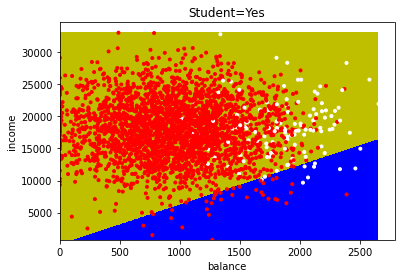

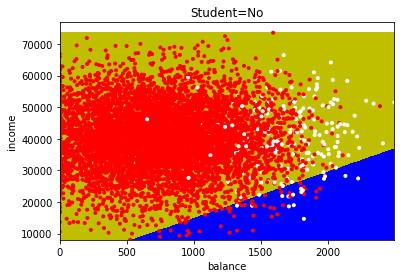

In [247]:
plot_decision_boundary(df1,df1['default'],lg_model1,'Student=Yes')  # 预测X, Y对应坐标
plot_decision_boundary(df2,df2['default'],lg_model2,'Student=No')

# LDA

In [277]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
def dual_var_lda(data,s_type):
    lda = LinearDiscriminantAnalysis()
    X = data.iloc[:,2:]
    y = data['default']
    X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=1)
    lda.fit(X_train,y_train)
    print(s_type,"- Accuracy:",lda.score(X_test,y_test))
    return lda

In [278]:
lda_model1 = dual_var_lda(df1,'Student=Yes')
lda_model2 = dual_var_lda(df2,'Student=No')

Student=Yes - Accuracy: 0.9643463497453311
Student=No - Accuracy: 0.9801699716713881


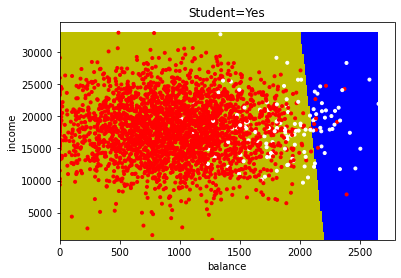

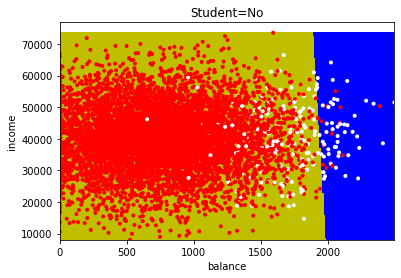

In [276]:
plot_decision_boundary(df1,df1['default'],lda_model1,'Student=Yes')
plot_decision_boundary(df2,df2['default'],lda_model2,'Student=No')

## 混淆矩阵

In [283]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
def multi_var_lda(data):
    lda = LinearDiscriminantAnalysis()
    X = data.iloc[:,1:]
    y = data['default']
    X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=1)
    lda.fit(X_train,y_train)
    y_pred = lda.predict(X_test)
    print("Accuracy:",lda.score(X_test,y_test))
    return y_pred,y_test

Accuracy: 0.9755
[[1935    6]
 [  43   16]]


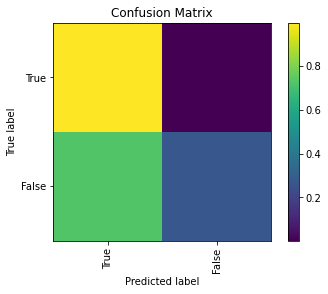

In [286]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, labels_name, title):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]    # 归一化
    plt.imshow(cm, interpolation='nearest')    # 在特定的窗口上显示图像
    plt.title(title)    # 图像标题
    plt.colorbar()
    num_local = np.array(range(len(labels_name)))    
    plt.xticks(num_local, labels_name, rotation=90)    # 将标签印在x轴坐标上
    plt.yticks(num_local, labels_name)    # 将标签印在y轴坐标上
    plt.ylabel('True label')    
    plt.xlabel('Predicted label')
    plt.show()

y_pred,y_test = multi_var_lda(df)
cm = confusion_matrix(y_test,y_pred)
print(cm)
plot_confusion_matrix(cm, ['True','False'], "Confusion Matrix")

In [284]:
def perf_measure(y_true, y_pred):
    TP, FP, TN, FN = 0, 0, 0, 0

    for i in range(len(y_true)):
        if y_true[i] == 1 and y_pred[i] == 1:
           TP += 1
        if y_true[i] == 0 and y_pred[i] == 1:
           FP += 1
        if y_true[i] == 0 and y_pred[i] == 0:
           TN += 1
        if y_true[i] == 1 and y_pred[i] == 0:
           FN += 1

    return TP, FP, TN, FN